In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

# Overview

## Machine Learning Overview

## Problem Definition

# One-Dimensional Linear Regression Model

## Generate Synthetic Data

For this first example, we don't actually need to have a real data set. We will generate some noisy data so that we can also compare the final result derived from our model. In general we don't know anything about the data, besides the fact that it is a one-dimensional line. Let's start by writing down a simple equation:

$$y = \alpha x + \beta$$

In this equation, $x$ is the *independent variable*, $\alpha$ is the slope of the line, and $\beta$ is the vertical offset. Let's warm up by demonstrating these concepts.

First we generate regularly spaced values for the independent variable $x$ in some arbitrary interval, let's say $x \in [-5, +5]$:

In [3]:
# The third parameter, 0.01, defines the distance between consequtive points: 0, 0.01, 0.02, 0.03, etc.
x_regularly_spaced = np.arange(-5, 5, 0.01)
# How many sample do we have? This array is one dimension, so we need to take the first element of its shape:
print('Sample count: {}'.format(x_regularly_spaced.shape[0]))

Sample count: 1000


Since there are too many points to easily visualize, we are going to show only every 50 values of the array:

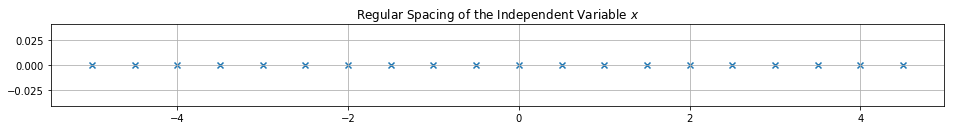

In [4]:
x_regularly_spaced_sample = x_regularly_spaced[::50]
plt.figure().set_size_inches(16,1.5)
plt.scatter(x_regularly_spaced_sample, np.zeros(x_regularly_spaced_sample.shape[0]), marker='x')
plt.grid()
_ = plt.title('Regular Spacing of the Independent Variable $x$')

The next step is to introduce some *jitter*. We can easily do that by adding a random number to each value $x$. Note that it is important that the mean of the random distribution is 0. In this case we take a Gaussian distribution with mean 0 and standard deviation 0.01, so that it is on the order of the space between points:

In [5]:
x_noisy = x_regularly_spaced + np.random.normal(scale=0.15, size=x_regularly_spaced.shape[0])

In [6]:
x_noisy[:10]

array([-4.90800615, -5.36913449, -5.09462838, -4.86111621, -5.12626753,
       -4.98375605, -4.6667622 , -4.99609183, -4.94172519, -4.68535336])

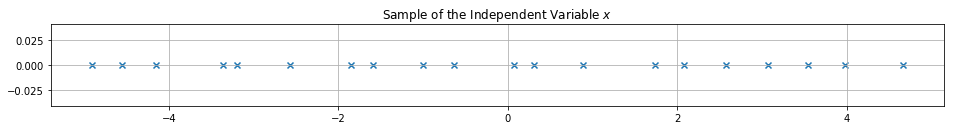

In [7]:
x_noisy_sample = x_noisy[::50]
plt.figure().set_size_inches(16,1.5)
plt.scatter(x_noisy_sample, np.zeros(x_noisy_sample.shape[0]), marker='x')
plt.grid()
_ = plt.title('Sample of the Independent Variable $x$')

We can now choose the parameters that we are going to estimate later:

$$\alpha = 0.35 $$
$$\beta = -0.75 $$

In [8]:
data_alpha = 0.35
data_beta = -0.75

In [9]:
y_regular = data_alpha * x_regularly_spaced + data_beta

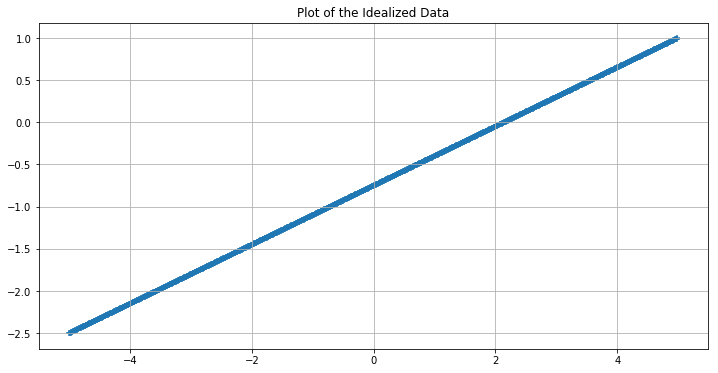

In [10]:
plt.figure().set_size_inches(12,6)
plt.scatter(x_regularly_spaced, y_regular, marker='+')
plt.grid()
_ = plt.title("Plot of the Idealized Data")

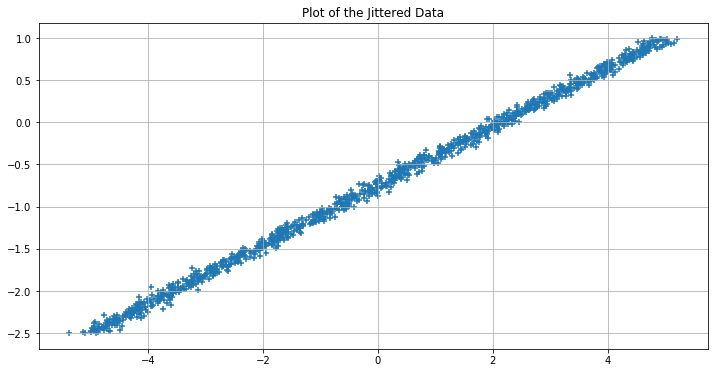

In [11]:
plt.figure().set_size_inches(12,6)
plt.scatter(x_noisy, y_regular, marker='+')
plt.grid()
_ = plt.title("Plot of the Jittered Data")

We might want to plot the jittered data against the regular $y$ for some reason:

The last step is to add some noise to the $y$ values:

In [12]:
y_noisy = y_regular + np.random.normal(scale=0.5, size=y_regular.shape[0])

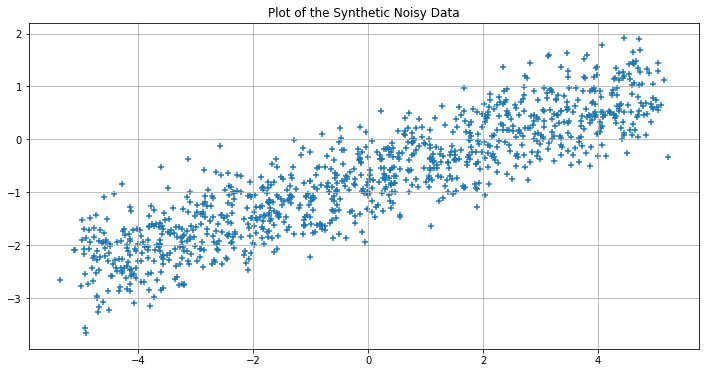

In [13]:
plt.figure().set_size_inches(12,6)
plt.scatter(x_noisy, y_noisy, marker='+')
plt.grid()
_ = plt.title("Plot of the Synthetic Noisy Data")

## Training Objective

In this arguably simplest form of machine learning, our goal is to build a *model* and estimate the parameters of this model. These parameters can be learned from the data and are *estimates* of the real parameters of the process that generated the data. Typically the process samples from an idealized mathematical probability distribution and we would like to estimate as best as we can the parameters of this probability distribution from a sample from it. In this case we have a model of a line $y = \alpha x + \beta$ and we would like to estimate its parameters $\alpha$ and $\beta$ as closely as we can given the noise in the data.

## Training Procedure

The word *training* is more or less obvious in the context of training neural networks, but in machine learning it most often refers to some kind of iterative process that is used to adjust the parameters of the model so it fits the data the best. Since the process is iterative, we have to know if we are doing better or worse as we go on with the training. Therefore, we need to define some sort of a metric that tells us how well our model compares to the data. In most machine learning models, this is done by the so called *loss function*.

### Loss Function

Every point of the training data gives us a tupe $(x, y)$ where $x$ is the independent variable and $y$ is the actual value returned by the function (model) that we are trying to approximate. If we call our model $m$ and our best estimate for the parameters $\hat{\alpha}$ and $\hat{\beta}$, then our model can be used to calculate $\tilde{y}$:

Our Model:

$$ m(x) = \hat{\alpha} x + \hat{\beta} $$

Calculated value by the model for input $x$:

$$ \tilde{y} = m(x)$$


For the same $x$, the quadratic distance $l = \left( y - \tilde{y} \right)^2 $ gives us a metric $l$ for how good our model is, dependent on the estimate for the parameters $\hat{\alpha}$ and $\hat{\beta}$. Since it is quadratic, $l = \left(y-\tilde{y}\right)^2 = 0$ means that we have a perfect estimate, while the higher the value of $l$ is, the worse our model is.

Since a model means some sort of simplification or approximation of the real thing, we need to evaluate how well our model does on the whole data set. If we are to arrive at a single number, then we need to average the result over all $N$ data points as follows:

$$\bar{l} = \frac{1}{N}\sum_{n=1}^{N}{\left( y - \tilde{y} \right)^2 } $$

We can now use the average loss metric $\bar{l}$ in our training procedure to test how well our model does, but we are not done yet.

The average loss $\bar{l}$ is a simple number that will always be the same when the same model $m(x)$ is used. However, we might like to test different models $m(x) = \hat{\alpha} x + \hat{\beta}$ by fiddling with the parameters $\hat{\alpha}$ and $\hat{\beta}$. This means that for a fixed $x$, our model can be seen as a function of these parameters:

$$ \mathcal{M}(\hat{\alpha}, \hat{\beta}) = \hat{\alpha} x + \hat{\beta} $$

For a **fixed data set** $(x, y)$ that has $N$ samples in it, now we can define a *loss function* $\mathcal{L}$ that depends only on the parameters $\hat{\alpha}$ and $\hat{\beta}$ of the model:

$$\mathcal{L}(\tilde{\alpha}, \tilde{\beta}) = \frac{1}{N}\sum_{n=1}^{N}{\left(y - \tilde{y}\right)^2} = \frac{1}{N}\sum_{n=1}^{N}{\left(y - \mathcal{M} \right)^2} = \frac{1}{N}\sum_{n=1}^{N}{\left(y - (\hat{\alpha} x + \hat{\beta}) \right)^2}$$

Note that this function is a mapping from $\mathbb{R}^k -> \mathbb{R}$ where $k$ is the dimensionality of the parameter space and thus defines some landscape in the **parameters space** spanned by the values of $\hat{\alpha}$ and $\hat{\beta}$. In this simple example, it will be a two-dimensional surface embedded in the three-dimensional space $(\hat{\alpha}$, $\hat{\beta}, \tilde{y})$.

### Optimization by Gradient Descent

We have mentioned that "training" refers to some sort of iterative procedure for improving the parameter estimates of a machine learning model. Now we are going to define the most popular way to do that for our linear model.

We already saw that the loss function $\mathcal{L}$ lives in parameter space and defines a potentially complicated landscape if we imagine it being a surface embedded in three-dimensional space. Our job is to find the coordinates of the lowest point in that landscape. That will give us values for the best estimate of the parameters $\hat{\alpha}$ and $\hat{\beta}$ for which we get the lowest average loss $\bar{l}$. Given our fixed data set, this is the best model that we can hope to find. Mathematically we can express this as follows:

$$ \underset{\hat{\alpha}, \hat{\beta}}{\arg \min \mathcal{M}(\hat{\alpha}, \hat{\beta})} $$

In general, the loss landscape is a very complicated multi-dimensional construct with a lot of local minima and maxima, so there is no guarantee that we can find the global minimum/maximum easily. Here, $\mathcal{L}$ is a convex function, so we don't have to worry about this.

We have now reduced the problem of training a machine learning model to an optimization problem where we search a potentially large parameter space using the properties of the loss function $\mathcal{L}$. The most naive approach would be to map out the loss landscape at random, however this becomes infeasible when the dimensionality increases significantly (neural networks have millions of parameters and therefore dimensions). It would be ideal if there is some sort of systematic exploration approach that guarantees that we can find our target. Indeed, there is such an approach, but unfortunately it does not guarantee that we will find the global minimum (in general). Still, this is our best, so let's investigate.

The first idea is to use the properties of the loss function $\mathcal{L}$. Elementary calculus teaches us that the first derivative of a function expresses its rate of change. In additiona, the sign of the derivative determines if the function is increasing or decreasing (it is 0 at an optimum or a saddle point). In a higher-dimensional settings we can build all derivatives of a function with respect to all of its arguments. These derivatives can then be used to form a vector called "gradient". The gradient points in the direction of the largest increase/decrease of the function. We can thus move in that direction and in some sense this is the fastest route that we can take to arrive at the nearest local or global minimum. Now let's express this idea in a more mathematical way so we can later on implement this in code.

First, we build the derivatives of the loss function with respect to its parameters:

$$ \frac{\partial \mathcal{L}}{\partial \hat{\alpha}} = \frac{1}{N}\sum_{n=1}^{N}{\frac{\partial}{\partial \hat{\alpha}}\left(y_n - (\hat{\alpha} x_n + \hat{\beta}) \right)^2} = -\frac{2}{N}\sum_{n=1}^{N}{\left(y_n - (\hat{\alpha} x_n + \hat{\beta}) \right) \frac{\partial}{\partial \hat{\alpha}}} \left(\hat{\alpha} x_n + \hat{\beta} \right) = -\frac{2}{N}\sum_{n=1}^{N} {\left(y_n-\hat{y}_n\right)} x_n $$

$$ \frac{\partial \mathcal{L}}{\partial \hat{\beta}} = \frac{1}{N}\sum_{n=1}^{N}{\frac{\partial}{\partial \hat{\beta}}\left(y_n - (\hat{\alpha} x_n + \hat{\beta}) \right)^2} = -\frac{2}{N}\sum_{n=1}^{N}{\left(y_n - (\hat{\alpha} x_n + \hat{\beta}) \right) \frac{\partial}{\partial \hat{\beta}}} \left(\hat{\alpha} x_n + \hat{\beta} \right) = -\frac{2}{N}\sum_{n=1}^{N} {\left(y_n-\hat{y}_n\right)} $$

The gradient is now simply the vector:

$$ \nabla \mathcal{L} = \left( \frac{\partial \mathcal{L}}{\partial \hat{\alpha}}, \frac{\partial \mathcal{L}}{\hat{\beta}} \right) $$

The second idea is to use the gradient in order to update the parameters of the model. If we summarize all parameters of the models in a vector $\theta = \left(\hat{\alpha}, \hat{\beta}\right)$, then we can use the following rule to execute the update:

$$ \theta_{i+1} = \theta_{i} + r \nabla \mathcal{L} $$

where the index $i$ represents the current time step $i$ and $r$ is a hyperparameter (freely chosen) called *learning rate*. The learning rate has an important role in determining how fast and how well the training process progresses. We are going to illustrate some of its properties later on. 

### Stochastic Gradient Descent

As we discussed previously, the training method that we use is iterative, i.e. it progresses gradually and doesn't need all of the available data at once for the required calculations. Now we need to think carefully how to design this process.

The first question is how do we exactly improve the model? We already know the update rule that changes the model parameters, but when should we apply it? Obviosly we can either apply it after evaluating every single data point or after processing the full data set, or somewhere in between. In the first case, we simply do not have enough data (from a single data point) to asses the average behaviour of the model - remember that our metric is the *average* loss $\bar{l}$ and our objective is to *approximate* the real data function/model as much as possible. On the other extreme, processing the full data set and then applying the update rule might not be feasible when dealing with very complex models and data set - in this case the learning is going to be extremely slow. Therefore, we need to take *some* of the data, update the model, then take some more data, and so on until the algorithm converges.

This smaller data "packet" that we use during training is called a **batch**. The size of the batch is again a hyperparameter and is commonly chosen on the order of a few hundred data samples - typically 64, 128, 256, etc. Unfortunately, there are no hard rules, only heuristics based on experience.

The second question is how to chose the elements of a batch from the available data set. One approach is to simply partition off the data set into batches of equal size and then iterate over them. In some cases this might represent a problem, since successive data points might be correlated in time. To break these, the data points in each batch can be chosen randomly from the full data set. When combined with a gradient descent optimization, this approach is called **stochastic** gradient descent.

## Summary of Training Procedure

Now we can summarize our training procedure as follows:

1. We create an index of the training data (implementation detail)
2. We shuffle the index (implementation detail)
3. We partition the index into batches of size K
4. We iterate over each batch defined by the partitioned index:
    1. We check if the convergence criteria are satisfied:
        1. If yes, then we finish the training process
        2. If no, we proceed with the next step
    2. We calculate the gradient of the loss function using the whole batch as a fixed data set
    3. We update the parameters of the model
    4. Move on to the next batch

### About Training Epochs

With more complicated networks, a single training run over all of the available data might not be enough. In this case we might repeat the training procedure several times using the same data (albeit shuffled in a different way every time). Usually at the end of the epoch we evaluate the model with testing data which we are going to describe next.

### Training Data, Testing Data, Validation Data

We now understand how to train the model. What is missing, however, is an evaluation of its "quality". In order to recognize problems like overfitting, we do not use all of the available data to train the model. Instead, we withold some of it for evaluation purposes. Since the model has never "seen" this data, we can use it to evaluate its performance in a much better way. Usually we split in training/testing data roughly in a 80:20 ratio (again, rule of thumb), but in some cases we might even split the unseen data further into a *test data set* and a *validation* data set that is used in a procedure called *cross validation*. Cross validation in general is not a concern for deep learning due to the availability of large volumes of data, but is very useful for other machine learning models on smaller data sets. (We have an example on that - link)

| Data Set| Function|
| :- |:-|
| Training Data Set | Adjust the model parameters (learning) |
| Testing Data Set | Evaluate how well the model does on unseen data |
| Validation Data Set | Use for cross-validation |

## Implementation

### Training / Test Data Split

We are going to implement an 80/20 training/testing data split. For this purpose we first create an index of all data, afterwards we split it and we can handle the training and testing data independently from each other.

#### Data Index

First we create an index of all the data. We shuffle it, so that we can sample easily by splitting it in two.

In [14]:
# Create an index of all data
data_index = np.arange(x_noisy.shape[0])

In [15]:
# Shuffle the index
np.random.shuffle(data_index)

In [16]:
# We see that it is shuffled
print(data_index[:10])

[ 65  23 256 542 162 749 837 589 547 401]


#### Index Split

In [17]:
# Calculate where to split first
split_boundary = int(0.8 * data_index.shape[0])
# Split the data into training and testing data
train_index = data_index[:split_boundary]
test_index = data_index[split_boundary:]

### Model Definition

Our model is simple enough, but for implementation purposes we might to encapsulate it in a class, so we can reuse it more easily. There are two operations that we have to apply on the model, namely:

1. Evaluation
2. Parameter update

To this end, it is better to save the parameters as member variables, as shown here:

In [18]:
class Model:
    def __init__(self, alpha, beta):
        """
        alpha - initial value for parameter alpha
        beta - initial value for parameter beta
        """
        self.params = np.array([alpha, beta])
    
    def evaluate(self, x):
        """
        x - Data input. For this simple model it can be either a single value or an array.
        return - Output given by the model (y hat)
        """
        return self.params[0] * x + self.params[1]

    def update(self, gradient, learning_rate):
        self.params -= learning_rate * gradient

### Loss Function Computation

The loss function $\mathcal {L}$ depends on the parameters of the model $\hat{\alpha}$ and $\hat{\beta}$, so we can simply use the model object to perform the following calculation:

$$\mathcal{L}(\tilde{\alpha}, \tilde{\beta}) =\frac{1}{N}\sum_{n=1}^{N}{\left(y - (\hat{\alpha} x + \hat{\beta}) \right)^2}$$

In [19]:
def calculate_loss(x, y, model):
    square_sums = (y - model.evaluate(x))**2
    n_inv = 1./x.shape[0]
    return n_inv * square_sums.sum()

### Gradient Computation

Since the gradient is computed quite often, let's create a function to do that. Remember that both gradients share a common part:

$$ -\frac{2}{N}\sum_{n=1}^{N} {\left(y_n-\hat{y}_n\right)} $$

We are going to reuse it in this function as follows:

In [20]:
def calculate_gradient(batch_x, batch_y, model):
    """
    batch_x: The independent variables in the batch
    batch_y: The output variables in the batch
    model:   An object representing our model. It has a function called 'evaluate'
    returns: Gradient vector as an array
    """
    # Multiplication is cheaper than division. We calculate the coefficient before the sum in advance
    n_inv_coeff = - 2./batch_x.shape[0]
    # We try to use 'vectorized' operations on numpy arrays for higher efficiency
    result_diff = (batch_y - model.evaluate(batch_x))
    grad_alpha = n_inv_coeff * (result_diff * batch_x).sum()
    grad_beta = n_inv_coeff * result_diff.sum()
    # Return the gradient vector as an array
    return np.array([grad_alpha, grad_beta])

### Training Process

Here we define the training procedure. Some important hyper parameters are defined in the beginning

In [21]:
def train(data_x, data_y, training_index, testing_index, batch_size, model, epoch_count, learning_rate):
    # Use this array to save data about the training process
    training_data = []
    for epoch in range(epoch_count):
        print('--- Epoch {0:0>2} ---'.format(epoch))
        # We need to shuffle the training index at the start of each training epoch
        np.random.shuffle(training_index)
        # batch_number is the number of the batch, while batch_partition tells us where in the training_index
        # this batch starts
        for batch_number, batch_partition in enumerate(np.arange(training_index.shape[0])[::batch_size]):
            # This gives us the indices of all data points for this batch in the training data array
            batch_index = training_index[batch_partition:batch_partition+batch_size]
            batch_x = data_x[batch_index]
            batch_y = data_y[batch_index]
            # Evaluate the model for the given input data
            model_result = model.evaluate(batch_x)
            # Calculate the average gradient
            gradient = calculate_gradient(batch_x, batch_y, model)
            # Update the model parameters
            model.update(gradient, learning_rate)
            # Evaluate on the testing data     
            np.random.shuffle(testing_index)
            test_x = data_x[testing_index]
            test_y = data_y[testing_index]
            test_loss = calculate_loss(test_x, test_y, model)
            # Show the loss
            # print(batch_number, test_loss)
            training_data.append((batch_number, test_loss))
    return np.array(training_data)


### Main Function

In [22]:
def run_linear_regression(batch_size, epoch_count, learning_rate):
    # Create the model
    model = Model(np.random.random(), np.random.random())
    # Train the model
    training_data = train(x_noisy, y_noisy, train_index, test_index, batch_size, model, epoch_count, learning_rate)
    # Plot the learning rate
    t = np.arange(training_data.shape[0])
    plt.plot(t, training_data[:,1])
    plt.grid()
    plt.title('Loss / Batch')
    # We return the model, so we can do further plots
    return model

### Hyperparameter Investigation

--- Epoch 00 ---
--- Epoch 01 ---
--- Epoch 02 ---
--- Epoch 03 ---
--- Epoch 04 ---
--- Epoch 05 ---
--- Epoch 06 ---
--- Epoch 07 ---


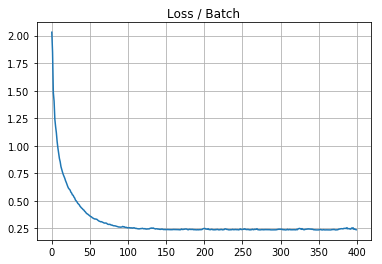

In [23]:
model_01 = run_linear_regression(16, 8, 0.01)

### Final Result Analysis

First, let's prepare the 'target' that we are going to compare our model against:

In [24]:
# Original testing data
test_x = x_noisy[test_index]
test_y = y_noisy[test_index]
# Input data for the comparison between the 'real' line and the model
plot_x = np.arange(-5, 5, 0.1)
target_y = data_alpha * plot_x + data_beta

We are going to make several plot, so we need a function for that:

In [25]:
def plot_results(model, title):
    plt.figure().set_size_inches(12,6)
    legend_data = plt.scatter(test_x, test_y, marker='x', label='Test Data')
    plt.grid()
    # Plot the 'real' line
    legend_target, = plt.plot(plot_x, target_y, color='black', label='Target')
    # Plot the model or inferred line
    legend_model, = plt.plot(plot_x, model.evaluate(plot_x), color='red', label='Model')
    plt.legend([legend_data, legend_target, legend_model], ['Data', 'Target', 'Model'])
    _ = plt.title(title)

#### Very Good Fit

The hyperparameter of this linear regression have been chosen so that the model converges very well. As we can see, the average loss for each batch reaches a minimum and doesn't improve further. Since we have introduced noise in the x and y data points artificially, the loss can not converge to 0.

--- Epoch 00 ---
--- Epoch 01 ---
--- Epoch 02 ---
--- Epoch 03 ---
--- Epoch 04 ---
--- Epoch 05 ---
--- Epoch 06 ---
--- Epoch 07 ---
--- Epoch 08 ---
--- Epoch 09 ---


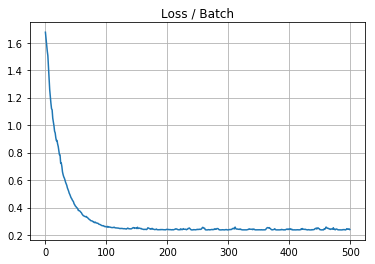

In [46]:
model_good_fit = run_linear_regression(16, 10, 0.01)

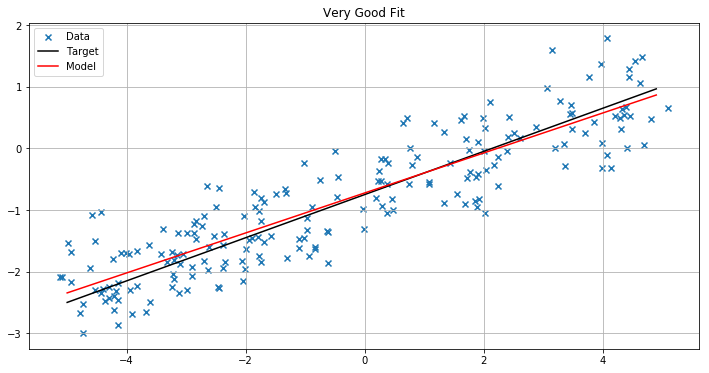

In [27]:
plot_results(model_good_fit, 'Very Good Fit')

#### Untrained

Here we can see the effect of very little training. We train for one epoch only and we chose a large batch size, so that the model doesn't get a change to update its parameters much. Obviously, the model differs from the target significantly.

--- Epoch 00 ---


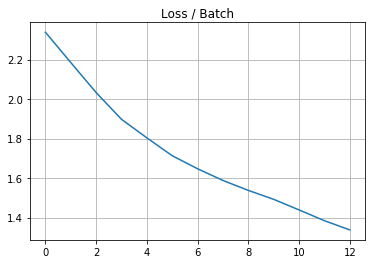

In [47]:
model_untrained = run_linear_regression(64, 1, 0.01)

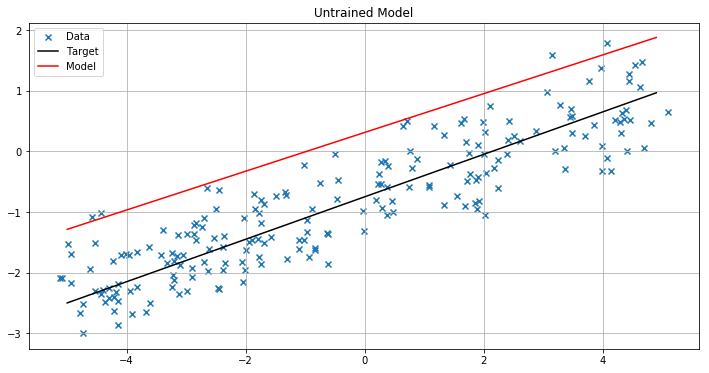

In [29]:
plot_results(model_untrained, 'Untrained Model')

#### Learning Rate Too Large

We can chose the learning rate either too large or too small. If it is small, the parameter search progresses very slowly, but smoothly, since there are not large jumps. If, on the other hand, we chose the learning rate too large, then we might 'jump over' some local minima and we might not be find the optimimum easily. In that case we need a more 'fine grained' learning rate to improve the training process

--- Epoch 00 ---
--- Epoch 01 ---
--- Epoch 02 ---
--- Epoch 03 ---
--- Epoch 04 ---
--- Epoch 05 ---
--- Epoch 06 ---
--- Epoch 07 ---


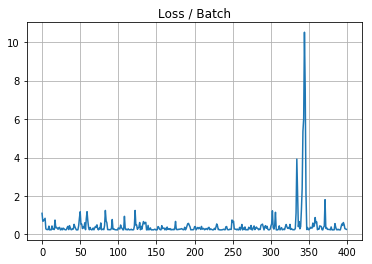

In [30]:
model_large_learning_rate = run_linear_regression(16, 8, 0.1)

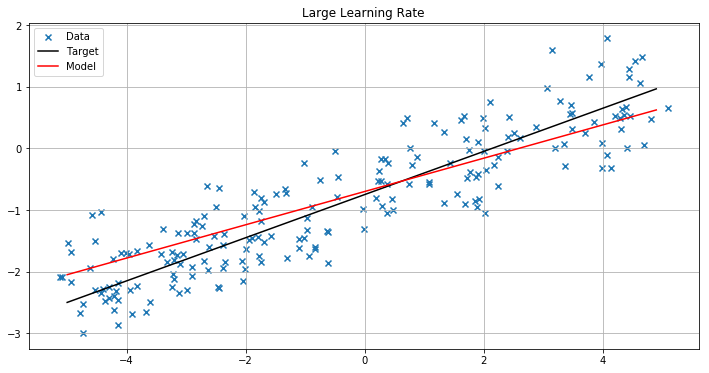

In [31]:
plot_results(model_large_learning_rate, 'Large Learning Rate')

# N-Dimensional Linear Regression Model

In [32]:
df = pd.read_csv('./data/kc_house_data.csv', index_col='id', )

In [33]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
df[:20]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [219]:
noncat_columns = ['price', 'sqft_living', 'sqft_lot', 'sqft_above' ]

In [220]:
house_data = df[noncat_columns]

In [221]:
house_data[:20]

,price,sqft_living,sqft_lot,sqft_above
id,,,,
7129300520,221900.0,1180,5650,1180
6414100192,538000.0,2570,7242,2170
5631500400,180000.0,770,10000,770
2487200875,604000.0,1960,5000,1050
1954400510,510000.0,1680,8080,1680
7237550310,1225000.0,5420,101930,3890
1321400060,257500.0,1715,6819,1715
2008000270,291850.0,1060,9711,1060
2414600126,229500.0,1780,7470,1050


In [222]:
def scale_array(x):
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    return min_max_scaler.fit_transform(x)

In [223]:
class MultilinearModel:
    def __init__(self, initial_params):
        """
        alpha - initial value for parameter alpha
        beta - initial value for parameter beta
        """
        self.params = initial_params
    
    def evaluate(self, x):
        """
        x - Data input. For this simple model it can be either a single value or an array.
        return - Output given by the model (y hat)
        """
        # return self.params[0] * x + self.params[1]
        return np.dot(x, self.params[:-1]) + self.params[-1]

    def update(self, gradient, learning_rate):
        self.params -= learning_rate * gradient

In [224]:
def calculate_multilinear_loss(x, y, model):
    square_sums = (y - model.evaluate(x))**2
    n_inv = 1./x.shape[0]
    return n_inv * square_sums.sum()

In [225]:
def calculate_multilinear_gradient(batch_x, batch_y, model):
    """
    batch_x: The independent variables in the batch
    batch_y: The output variables in the batch
    model:   An object representing our model. It has a function called 'evaluate'
    returns: Gradient vector as an array
    """
    # Multiplication is cheaper than division. We calculate the coefficient before the sum in advance
    n_inv_coeff = - 2./batch_x.shape[0]
    # We try to use 'vectorized' operations on numpy arrays for higher efficiency
    # print(batch_y.shape, model.evaluate(batch_x).shape)
    result_diff = (batch_y - model.evaluate(batch_x))
    # Here we multiply the column vector result_diff with each column of the matrix batch_x, then
    # we sum all column elements.
    grad_weights = n_inv_coeff * np.tensordot(result_diff, batch_x, axes=1)
    # The last parameter is the bias
    grad_bias = n_inv_coeff * result_diff.sum()
    # Return the gradient vector as an array
    return np.append(grad_weights, grad_bias)

In [226]:
def multilinear_train(data_x, data_y, training_index, testing_index, batch_size, model, epoch_count, learning_rate):
    # Use this array to save data about the training process
    training_data = []
    for epoch in range(epoch_count):
        print('--- Epoch {0:0>2} ---'.format(epoch))
        # We need to shuffle the training index at the start of each training epoch
        np.random.shuffle(training_index)
        # batch_number is the number of the batch, while batch_partition tells us where in the training_index
        # this batch starts
        for batch_number, batch_partition in enumerate(np.arange(training_index.shape[0])[::batch_size]):
            # This gives us the indices of all data points for this batch in the training data array
            batch_index = training_index[batch_partition:batch_partition+batch_size]
            batch_x = data_x[batch_index]
            batch_y = data_y[batch_index]
            # Evaluate the model for the given input data
            model_result = model.evaluate(batch_x)
            # Calculate the average gradient
            gradient = calculate_multilinear_gradient(batch_x, batch_y, model)
            # Update the model parameters
            model.update(gradient, learning_rate)
            # Evaluate on the testing data     
            np.random.shuffle(testing_index)
            test_x = data_x[testing_index]
            test_y = data_y[testing_index]
            test_loss = calculate_multilinear_loss(test_x, test_y, model)
            # Show the loss
            # print(batch_number, test_loss)
            training_data.append((batch_number, test_loss))
        print('Loss: {}'.format(training_data[-1][1]))
    return np.array(training_data)


In [234]:
def run_multilinear_regression(batch_size, epoch_count, learning_rate):
    # Create the model
    model = MultilinearModel(np.random.random(4))
    # Extract only the columns we need as a numpy matrix (2D array)
    data = df.as_matrix(columns=['price', 'sqft_living', 'sqft_lot','sqft_above'])
    # Normalize the data in the range [0, 1]
    data_normalized = scale_array(data)
    # Split the data into input and result
    house_data_x = data_normalized[:, 1:]
    house_data_y = data_normalized[:, 0]
    # Prepare the indices
    house_index = np.arange(house_data_y.shape[0])
    np.random.shuffle(house_index)
    split_boundary = int(0.8 * house_index.shape[0])
    train_index = house_index[:split_boundary]
    test_index = house_index[split_boundary:]
    # Train the model
    training_data = multilinear_train(
        house_data_x, house_data_y, train_index, test_index, batch_size, model, epoch_count, learning_rate
    )
    # Plot the learning rate
    t = np.arange(training_data.shape[0])
    plt.plot(t, training_data[:,1])
    plt.grid()
    plt.title('Loss / Batch')
    # We return the model, so we can do further plots
    return (model, house_data_x, house_data_y, test_index)

--- Epoch 00 ---
Loss: 0.0021982380125392413


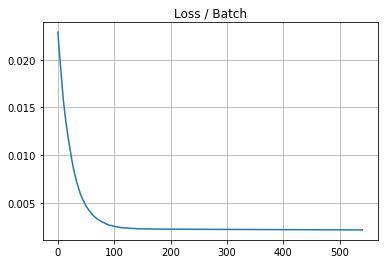

In [238]:
model_multilinear, house_data_x, house_data_y, house_test_index = run_multilinear_regression(32, 1, 0.01)

In [239]:
model_multilinear.params

array([ 0.4189627 ,  0.80364301,  0.22591945, -0.03930523])

In [266]:
def plot_multilinear_factor(factor_index, xlabel, ylabel, model, title):
    # data_normalized = scale_array(df[['price', factor_name]].values)
    # Plot the price as a function of the factor
    # price = data_normalized[:,0]
    # factor = data_normalized[:,1]
    # Prepare the plot
    plt.figure().set_size_inches(12,6)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    legend_data = plt.scatter(house_data_x[:, factor_index], house_data_y, marker='x', label='Data')
    plt.grid()
    # Plot the model or inferred line
    plot_x = np.arange(0, 1, 0.05)
    slope, offset = model.params[factor_index], model.params[-1]
    legend_model, = plt.plot(plot_x, plot_x * slope + offset, color='red', label='Model')
    #plt.legend([legend_data, legend_target, legend_model], ['Data', 'Target', 'Model'])
    _ = plt.title(title)

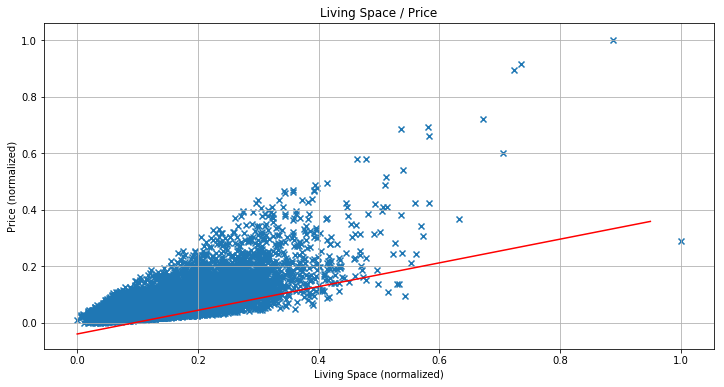

In [268]:
plot_multilinear_factor(
    0, 'Living Space (normalized)', 'Price (normalized)', model_multilinear, 'Living Space / Price'
)

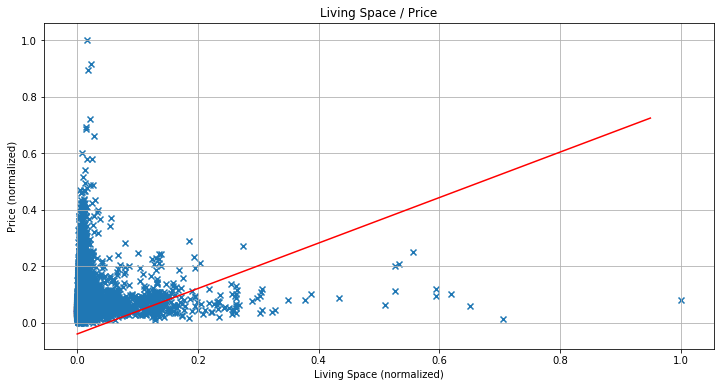

In [269]:
plot_multilinear_factor(
    1, 'Living Space (normalized)', 'Price (normalized)', model_multilinear, 'Living Space / Price'
)

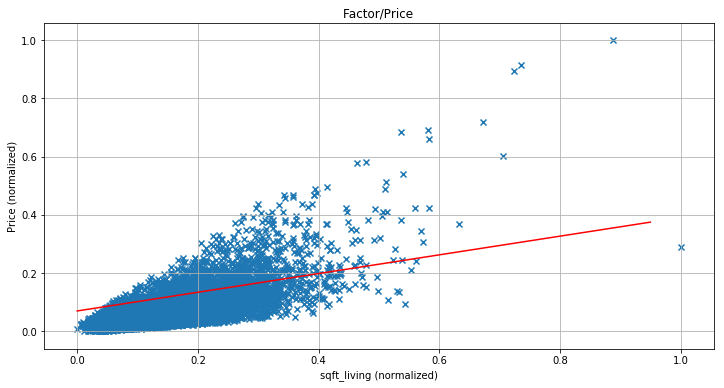

In [214]:
plot_multilinear_factor(
    2, 'sqft_living', 'sqft_living (normalized)', 'Price (normalized)', model_multilinear, 'Factor/Price'
)

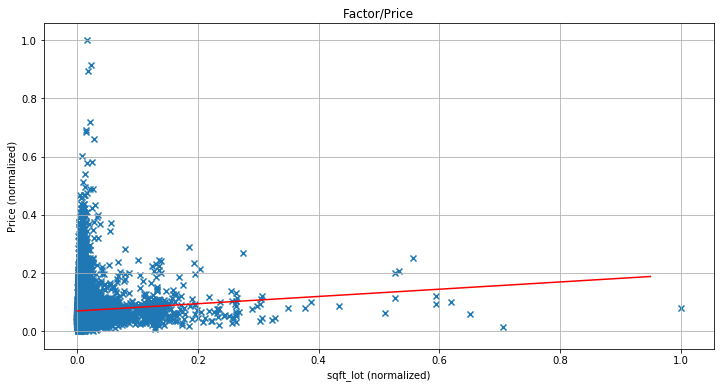

In [215]:
plot_multilinear_factor(
    3, 'sqft_lot', 'sqft_lot (normalized)', 'Price (normalized)', model_multilinear, 'Factor/Price'
)

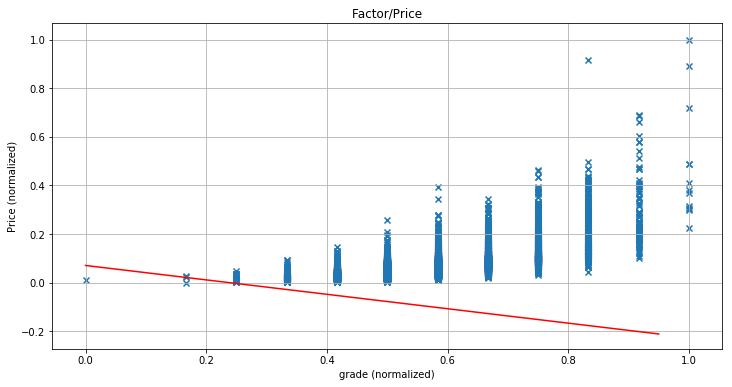

In [216]:
plot_multilinear_factor(
    4, 'grade', 'grade (normalized)', 'Price (normalized)', model_multilinear, 'Factor/Price'
)

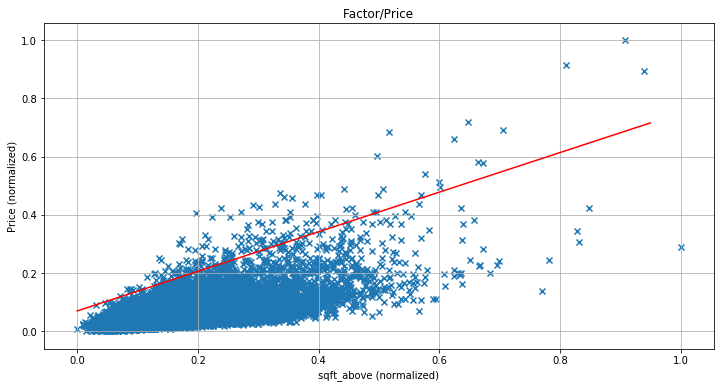

In [218]:
plot_multilinear_factor(
    5, 'sqft_above', 'sqft_above (normalized)', 'Price (normalized)', model_multilinear, 'Factor/Price'
)

# Polynomial Model

# Logistic Regression Model

Most interesting data (images, audio signals, etc.) can be represented as vectors in a high-dimensional space. As an example, each pixel value of an image is an element of a vector with a dimension that is equal to the number of pixels in an image. The MNIST database consists of greyscale images of 28 x 28 pixel size, so the whole image can be represented as a vector in 784-dimensional space where every element of the vector can take on values between 0 and 1. The euclidean distance between such vectors represents a very rough metric of how close they are to each other.